# Extract linguistic features

In [1]:
import os
import pickle

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.utils import shuffle

from sarcsdet.utils.mark_ling_feat import (
    funny_marks_feature, interjections_feature, get_popular_items
)

### Get data

In [2]:
data_path = '../data/Sarcasm_on_Reddit'

In [3]:
df = pd.read_pickle(os.path.join(data_path, 'rus-train-balanced-sarcasm.pkl'))

### Column selection

In [4]:
df['rus_comment'] = pd.Series(df['rus_comment'], dtype='str')
df['rus_parent_comment'] = pd.Series(df['rus_parent_comment'], dtype='str')

df['label'] = pd.Series(df['label'], dtype='int')

df['score'] = pd.Series(df['score'], dtype='int')
df['ups'] = pd.Series(df['ups'], dtype='int')
df['downs'] = pd.Series(df['downs'], dtype='int')

df['author'] = pd.Series(df['author'], dtype='category')
df['author'] = pd.factorize(df['author'])[0] + 1

df['subreddit'] = pd.Series(df['subreddit'], dtype='category')
df['subreddit'] = pd.factorize(df['subreddit'])[0] + 1

### Add Linguistic Features

In [5]:
df['exclamation'] = df.rus_comment.apply(lambda s: s.count('!'))
df['question'] = df.rus_comment.apply(lambda s: s.count('?'))
df['dotes'] = df.rus_comment.apply(lambda s: s.count('...'))
df['quotes'] = df.rus_comment.apply(lambda s: s.count("\"") + s.count("\'"))

In [6]:
df['funny_mark'] = df.rus_comment.apply(funny_marks_feature)

In [7]:
df['interjections'] = df.rus_comment.apply(interjections_feature)

In [8]:
df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,rus_comment,rus_parent_comment,exclamation,question,dotes,quotes,funny_mark,interjections
0,0,You do know west teams play against west teams...,1,1,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,"Вы ведь знаете, что западные команды играют пр...",Блейзеры и (5-е и 6-е место на Западе) даже не...,0,1,0,0,0,0
1,0,"They were underdogs earlier today, but since G...",2,2,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.,"Раньше они были аутсайдерами, но после того, к...",Они хотят побеждать.,0,0,0,0,0,0
2,0,"This meme isn't funny none of the ""new york ni...",3,3,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz,"Этот мем не смешной, как и ниггер из Нью-Йорка.","ублюдок, не убивай мой кайф",0,0,0,0,0,0
3,0,I could use one of those tools.,4,4,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,Я мог бы использовать один из этих инструментов.,"Да, могу подтвердить, что видел инструмент, ко...",0,0,0,0,0,0
4,0,"I don't pay attention to her, but as long as s...",5,5,0,0,0,2016-09,2016-09-02 10:35:08,do you find ariana grande sexy ?,"Я не обращаю на нее внимания, но пока она зако...",ты находишь Ариану Гранде сексуальной?,0,0,0,0,0,0


### Choose Features

In [9]:
dft = df[[
    'label', 'author', 'subreddit', 'score', 'ups', 'downs', 
    'exclamation', 'question', 'quotes', 'dotes', 'funny_mark', 'interjections'
]]

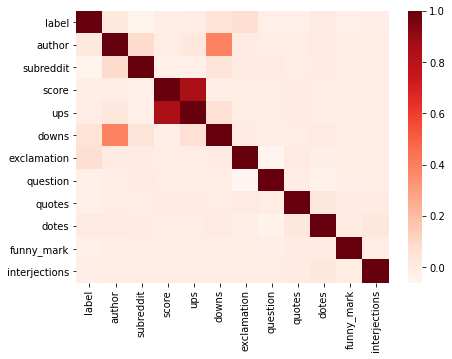

In [10]:
plt.figure(figsize=(7, 5))
cor = dft.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

### Remove highly correlated features

In [11]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.3)]
df.drop(to_drop, axis=1, inplace=True)

### Save dataset

In [12]:
df.to_pickle(os.path.join(data_path, 'rus-train-balanced-sarcasm-ling_feat.pkl'))